# EDA on the `MLA_100k_checked_v3` dataset

In [1]:
import pandas as pd

from utils import *

## Load the dataset

In [2]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,NaN,1,1440454040000,0,1,True


### Shipping

In [3]:
X_dataframe["shipping"].describe()

count                                                 90000
unique                                                   39
top       {'local_pick_up': True, 'methods': [], 'tags':...
freq                                                  37292
Name: shipping, dtype: object

In [4]:
X_dataframe["shipping"].isna().sum()

np.int64(0)

In [5]:
X_dataframe["shipping"].iloc[0]

"{'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}"

#### Dimensions

In [17]:
import ast
X_dataframe["shipping"].apply(lambda x: ast.literal_eval(x)["dimensions"]).value_counts()

shipping
33x20x12,300     4
30x30x30,650     3
33x20x12,80      2
33x20x12,400     2
33x20x12,1000    2
33x20x12,100     2
5x25x25,150      1
33x20x12,500     1
10x10x20,700     1
10x20x20,350     1
5x20x30,650      1
33x20x12,800     1
15x30x45,650     1
Name: count, dtype: int64

In [19]:
X_dataframe["shipping"].apply(
    lambda x: ast.literal_eval(x)["dimensions"]
).isnull().sum()

np.int64(89978)

99% of the information in the dimensions is null

#### Local Pickup

In [21]:
X_dataframe["shipping_local_pick_up"] = X_dataframe["shipping"].apply(
    lambda x: ast.literal_eval(x)["local_pick_up"]
)
print(X_dataframe["shipping_local_pick_up"].count())
X_dataframe["shipping_local_pick_up"].value_counts()

90000


shipping_local_pick_up
True     71577
False    18423
Name: count, dtype: int64

In [22]:
res = column_analysis("shipping_local_pick_up", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_local_pick_up,,,,
False,18423,0.503990,0.496770,0.511208
True,71577,0.452142,0.448499,0.455791


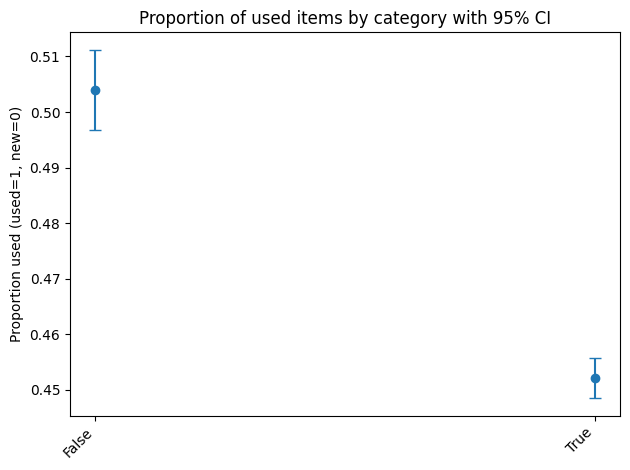

In [23]:
plot_column_analysis(res)

There's a difference in distribution of the condition, conditioned if there's local pickup or not. 
Slightly more chance to be new if there's local pickup

In [24]:
X_dataframe.loc[X_dataframe["shipping_local_pick_up"] == True]

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity,used,shipping_local_pick_up
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,1446669773000,active,NaN,NaN,1,1441485773000,0,1,False,True
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,1448474910000,active,NaN,NaN,1,1443290910000,0,1,True,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,1447027027000,active,NaN,NaN,1,1441843027000,0,1,True,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,1449191596000,active,NaN,NaN,1,1443466076000,0,1,False,True
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,1445638040000,active,NaN,NaN,1,1440454040000,0,1,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89992,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,1000.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Efectivo', 'id': 'MLAMO', 't...",2024252139,[],bronze,1000.0,[],...,1446817111000,active,NaN,NaN,1,1441633111000,0,1,True,True
89993,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,350.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",4094359441,[],bronze,350.0,[],...,1448376757000,active,NaN,NaN,10,1443192757000,0,10,False,True
89996,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,126.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",4665194056,[],bronze,126.0,[],...,1448148621000,paused,NaN,NaN,1,1442964621000,1,1,False,True
89997,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,300.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Efectivo', 'id': 'MLAMO', 't...",3046474001,[],bronze,300.0,[],...,1445636031000,active,NaN,NaN,1,1440452031000,0,1,False,True


#### Free Shipping

In [55]:
X_dataframe["shipping_free_shipping"] = X_dataframe["shipping"].apply(lambda x: x["free_shipping"])
X_dataframe["shipping_free_shipping"].value_counts()

shipping_free_shipping
False    87303
True      2697
Name: count, dtype: int64

In [56]:
res = column_analysis("shipping_free_shipping", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_free_shipping,,,,
False,87303,0.474806,0.471494,0.478119
True,2697,0.072673,0.062874,0.082473


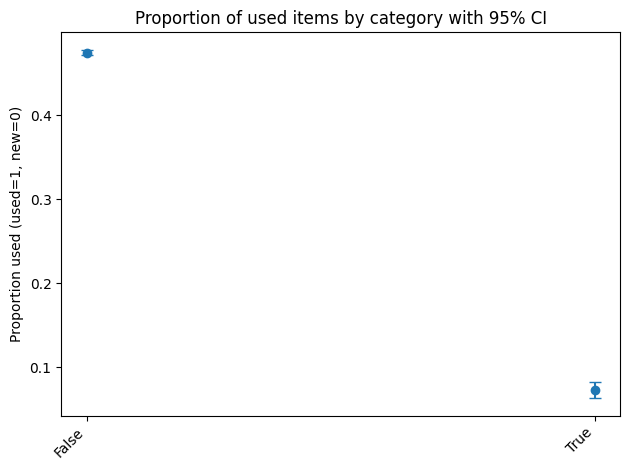

In [57]:
plot_column_analysis(res)

If the shipping is free, it's very likely to be new. If not, there's a ~50/50 chance

#### Methods

In [25]:
def check_methods(value):
    value = ast.literal_eval(value)
    if "methods" in value.keys():
        return value["methods"]
    elif "free_methods" in value.keys():
        return value["free_methods"]
    else:
        return None


X_dataframe["shipping"].apply(check_methods).value_counts()

shipping
[]                                                                                                                                  87310
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73328}]                                                                     2641
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73330}]                                                                       37
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 501145}]                                                                       6
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 501146}]                                                                       4
[{'rule': {'value': None, 'free_mode': 'country'}, 'id': 73328}, {'rule': {'value': None, 'free_mode': 'country'}, 'id': 73330}]        1
Name: count, dtype: int64

Seems like we have two possible methods: unknown and different IDs for free mode

In [26]:
X_dataframe["shipping_method"] = X_dataframe["shipping"].apply(check_methods).apply(
    lambda x: "free_mode" if isinstance(x, list) and len(x) > 0 else "unknown"
)
X_dataframe["shipping_method"].value_counts()

shipping_method
unknown      87311
free_mode     2689
Name: count, dtype: int64

In [27]:
res = column_analysis("shipping_method", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_method,,,,
unknown,87311,0.474774,0.471463,0.478087
free_mode,2689,0.072518,0.063313,0.082942


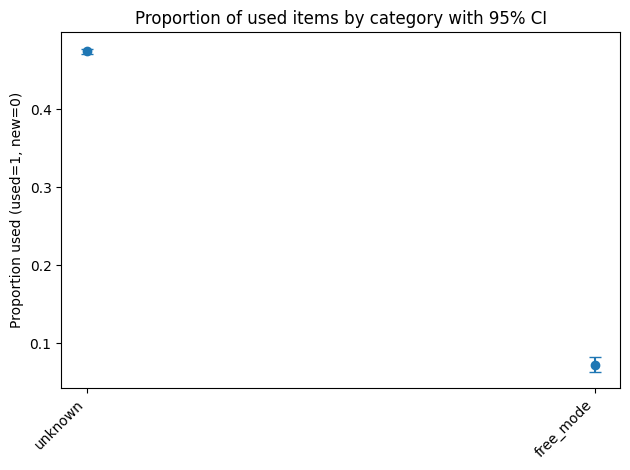

In [28]:
plot_column_analysis(res)

If the shipping has a "free_mode" method is more likely to be new

#### Tags

In [29]:
X_dataframe["shipping"].apply(lambda x: ast.literal_eval(x)["tags"]).value_counts()

shipping
[]                               89941
[relisted_with_modifications]       50
[free_method_upgraded]               9
Name: count, dtype: int64

More than 99% has no tags. It doesn't make sense to add this feature to the training dataset

### Mode

In [30]:
X_dataframe["shipping"].apply(lambda x: ast.literal_eval(x)["mode"]).value_counts()

shipping
me2              46059
not_specified    40725
custom            3130
me1                 86
Name: count, dtype: int64

In [32]:
X_dataframe["shipping_mode"] = X_dataframe["shipping"].apply(
    lambda x: ast.literal_eval(x)["mode"]
)
res = column_analysis("shipping_mode", X_dataframe)
display(res)

,n,prop_used,ci_lower,ci_upper
shipping_mode,,,,
not_specified,40725,0.511799,0.506943,0.516652
me2,46059,0.429493,0.424978,0.434019
custom,3130,0.326837,0.310625,0.343473
me1,86,0.000000,0.000000,0.042760


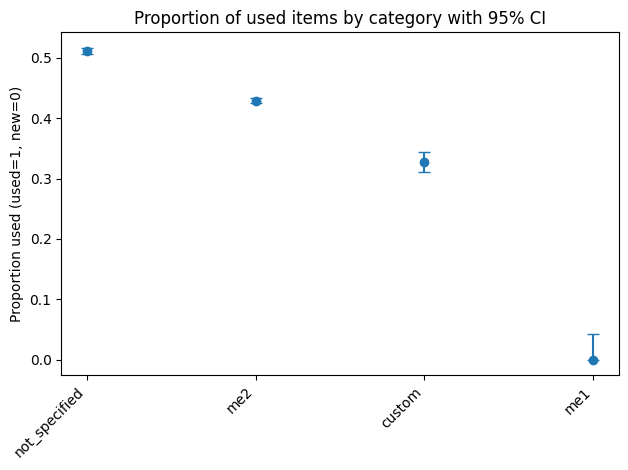

In [33]:
plot_column_analysis(res)

Each of the shipping modes have different condition distribution, and even me1 p is almost 1